In [302]:
import pandas as pd
import numpy as np
import seaborn
%matplotlib inline

In [270]:
""" modes function for column """

def mod_column(df, column) :
    modes = df[column].mode()
    if modes.count() == 0 :
        print("nothing has 2+ occurrences")
    return modes

In [271]:
""" modes function for table """

def mod_table(df) :
    modes = df.mode()
    #if modes.count() == 0 :
    #    print("nothing has 2+ occurrences")
    return modes

In [288]:
""" generate random data """

dates = pd.date_range('20170101', '20171231', freq = 'W-MON')
rdata = pd.DataFrame(np.random.randn(np.size(dates),4), index=dates, columns=['par1', 'par2', 'par3', 'par4'])
rdata['type'] = [chr(np.random.random_integers(65, 67)) for i in dates]
rdata.head(10)

,par1,par2,par3,par4,type
2017-01-02,-0.228451,-1.369694,1.075905,-0.870462,C
2017-01-09,-0.456867,-0.614962,1.742203,0.403774,C
2017-01-16,0.125048,-0.712953,-1.261021,0.180092,A
2017-01-23,0.266950,-0.373077,1.604188,-0.368558,B
2017-01-30,0.844408,0.318323,-2.190023,1.820397,C
2017-02-06,-0.711704,0.453270,-1.113069,-1.124487,C
2017-02-13,0.755220,-0.109122,-1.328037,0.019407,A
2017-02-20,-0.086440,1.180055,-0.216299,0.373316,C
2017-02-27,1.856814,-1.444923,-0.464435,0.488259,A
2017-03-06,0.095355,-0.528985,0.062813,-0.388322,C


In [289]:
""" mean, max, min, median and mode for the table """

print("mean", rdata.select_dtypes(exclude = ['object']).unstack().mean())
print("maximum", rdata.select_dtypes(exclude = ['object']).unstack().max())
print("minimum", rdata.select_dtypes(exclude = ['object']).unstack().min())
print("median", rdata.select_dtypes(exclude = ['object']).unstack().median())
print("modes", rdata.select_dtypes(exclude = ['object']).unstack().mode())

mean -0.0013142044298027806
maximum 2.20452323771
minimum -2.82155835501
median 0.05696977327548716
modes Series([], dtype: float64)


In [290]:
""" mean, max, min, median and mode for the each column """

for col in list(rdata) :
    print(col)
    print("modes\n", mod_column(rdata, col))
rdata.describe()

par1
nothing has 2+ occurrences
modes
 Series([], dtype: float64)
par2
nothing has 2+ occurrences
modes
 Series([], dtype: float64)
par3
nothing has 2+ occurrences
modes
 Series([], dtype: float64)
par4
nothing has 2+ occurrences
modes
 Series([], dtype: float64)
type
modes
 0    C
dtype: object


,par1,par2,par3,par4
count,52.000000,52.000000,52.000000,52.000000
mean,0.052111,-0.158028,0.045783,0.054878
std,0.891108,0.988542,0.992535,0.989126
min,-2.168216,-2.207837,-2.190023,-2.821558
25%,-0.556541,-0.727417,-0.790780,-0.625787
50%,0.146906,-0.096271,-0.015046,0.102289
75%,0.656235,0.328431,0.815643,0.505156
max,2.094137,2.010549,2.132810,2.204523


In [291]:
""" mean, max, min, median and mode for the each column for each types"""

print(rdata.groupby('type').apply(mod_table))

rdata.groupby('type').describe()

        par1  par2  par3  par4 type
type                               
A    0   NaN   NaN   NaN   NaN    A
B    0   NaN   NaN   NaN   NaN    B
C    0   NaN   NaN   NaN   NaN    C


par1       par2       par3       par4
type                                                  
A    count  20.000000  20.000000  20.000000  20.000000
     mean    0.027034  -0.095699  -0.241046   0.349206
     std     1.141364   1.007790   0.769561   0.915846
     min    -2.168216  -2.004445  -1.430076  -1.205270
     25%    -0.902175  -0.692843  -0.790780  -0.034463
     50%     0.198071  -0.129608  -0.348005   0.325530
     75%     0.671698   0.349951   0.169693   0.667940
     max     2.094137   1.942400   1.375373   2.204523
B    count   9.000000   9.000000   9.000000   9.000000
     mean   -0.009591  -0.395235   0.168941  -0.005118
     std     0.736450   0.599269   1.190668   1.319130
     min    -0.862798  -1.365260  -1.657402  -2.821558
     25%    -0.736829  -0.512414  -0.825537  -0.368558
     50%    -0.045270  -0.342047   0.525813   0.051127
     75%     0.442687   0.013207   1.290652   0.781691
     max     1.259925   0.358755   1.604188   1.658894
C    count  23.000000  23.000000  23.000000  23.000000
     mean    0.098061  -0.119407   0.247007  -0.177584
     std     0.717063   1.108836   1.064604   0.879863
     min    -1.341822  -2.207837  -2.190023  -1.647304
     25%    -0.342659  -0.834973  -0.473273  -0.749619
     50%     0.115482   0.187650   0.353732  -0.349906
     75%     0.732021   0.452835   0.960165   0.388545
     max     1.028695   2.010549   2.132810   1.820397

type
A    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
B    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
C    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

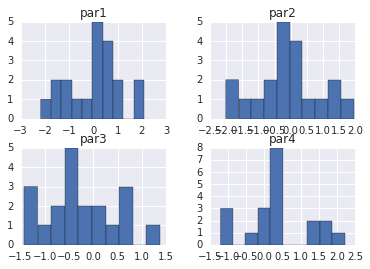

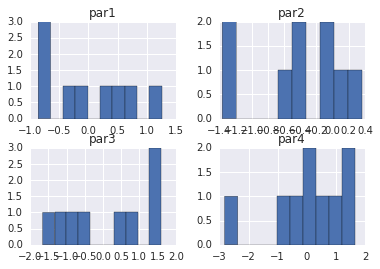

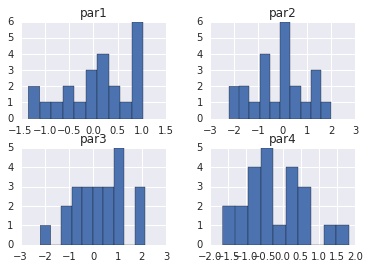

In [301]:
""" visualization """

rdata.groupby('type').hist()